<a href="https://colab.research.google.com/github/Srishtik-ui/Traning_program_of_ml-colud_security/blob/main/Day_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What is perform matrix  
the perform matrix is a




to devlop a model we need to blance Precision and Recall

what is True positive :- predicted positive, was actually positive.
ex - patients has cancer , and the model correctly say they do.




what is False positive :- Predicted postive , but was acutally Negative.

ex:- patient is healthy , but the model incorrectly say they have cancer.


False Negative:- Predicted negative but actually Positive.

ex :- person has cancer , but model say that they are healthy.

True negative :- Predicit negative and actually Negative.

ex:- Patient is healthy, and model say it correctly.


F1 Score :- The harmonic mean of precision And Recall


**Data prepration -> Feature Engineering -> Data Modeling -> Performance Measure**

Accuracy Trape :- accuracy create a flase sense of security in imblanced datasets.

Formula :- TP + TN / Total Predication

Accuracy is Statistically accurate, clinically useless.

AUC :- Area under curve

a threshold independent measure of ranking ability.

Auc = 0.5 : Random Guessing (NO VAlue)

AUC : 1.0 : Perfect Prediction.

Auc : 0.0 : prefectly Worng  


Auc is scale - invariant and thershold - invariant.

it measure how well the model ranks predictions, regardless of where the decision linw is drawn.



R2 score :- Explation the ability of variation in dataset.





RmSe : - Reduce the Size of result by using square root

MSe:-


MAE Remain stable, but RMSE spikes. Use RMSE when a single large error is uncceptable.




*   Condition             &         Recommendation Metric


*   DATA is imbalanceed             ==      F1 score

*   High cost of false negative   == REcall



*   HIgh cost of False positive  == Precision
*   Need probabilistic Ranking  == AUC/ Log Loss

*   Large Outlier are unacceptiable  == RMSE
*   Need simple interpretability == MAE






In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Heart_Disease_Prediction.csv')

In [ ]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0
ST depression,0


In [ ]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [ ]:
df.shape

(270, 14)

In [ ]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [ ]:
df.value_counts()

Age  Sex  Chest pain type  BP   Cholesterol  FBS over 120  EKG results  Max HR  Exercise angina  ST depression  Slope of ST  Number of vessels fluro  Thallium  Heart Disease
77   1    4                125  304          0             2            162     1                0.0            1            3                        3         Presence         1
29   1    2                130  204          0             2            202     0                0.0            1            0                        3         Absence          1
34   0    2                118  210          0             0            192     0                0.7            1            0                        3         Absence          1
     1    1                118  182          0             2            174     0                0.0            1            0                        3         Absence          1
35   0    4                138  183          0             0            182     0                1.4            1            0                        3         Absence          1
                                                                                                                                                                                ..
41   0    3                112  268          0             2            172     1                0.0            1            0                        3         Absence          1
          2                130  204          0             2            172     0                1.4            1            0                        3         Absence          1
                           126  306          0             0            163     0                0.0            1            0                        3         Absence          1
                           105  198          0             0            168     0                0.0            1            1                        3         Absence          1
40   1    4                152  223          0             0            181     0                0.0            1            0                        7         Presence         1
Name: count, Length: 270, dtype: int64

In [ ]:
cat_colum = df.select_dtypes(include='object').columns
print(cat_colum)

Index(['Heart Disease'], dtype='object')


In [ ]:
num_colum = df.select_dtypes(exclude='object').columns
print(num_colum )

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium'],
      dtype='object')


/tmp/ipython-input-1978633672.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df['BP'],palette='viridis')


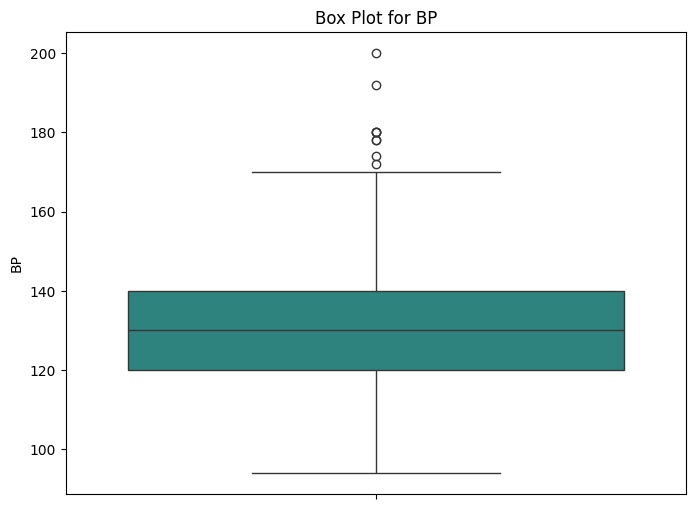

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['BP'],palette='viridis')
plt.title('Box Plot for BP')
plt.show()

/tmp/ipython-input-563015833.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df['Cholesterol'],palette='viridis')


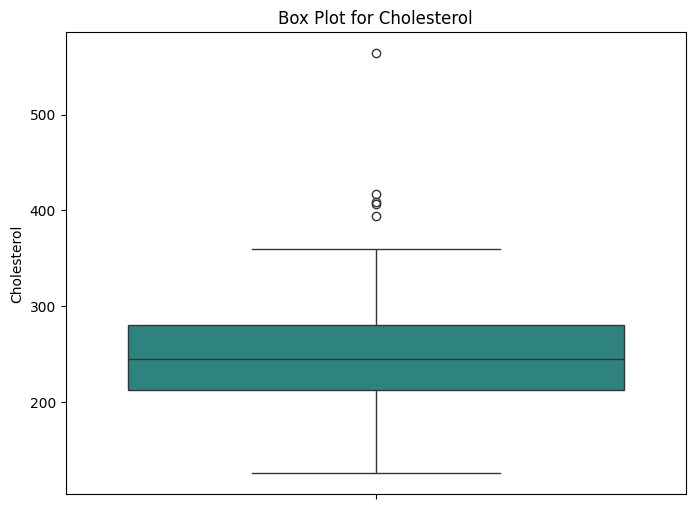

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Cholesterol'],palette='viridis')
plt.title('Box Plot for Cholesterol')
plt.show()

/tmp/ipython-input-3057081387.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df['Max HR'],palette='viridis')


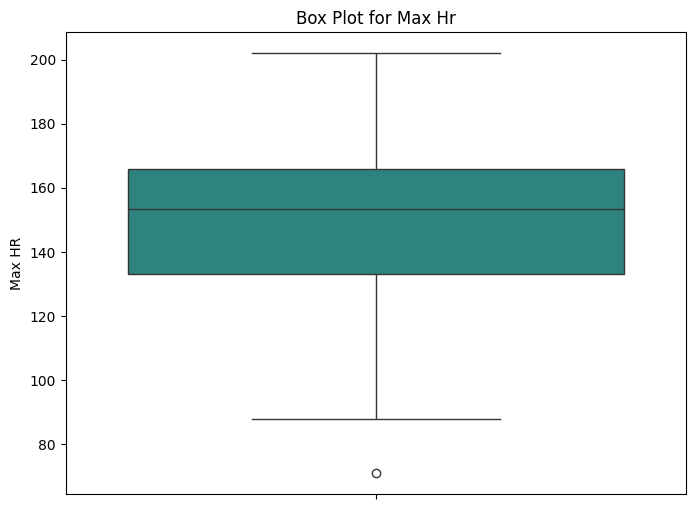

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Max HR'],palette='viridis')
plt.title('Box Plot for Max Hr')
plt.show()

/tmp/ipython-input-3674585929.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df['ST depression'],palette='viridis')


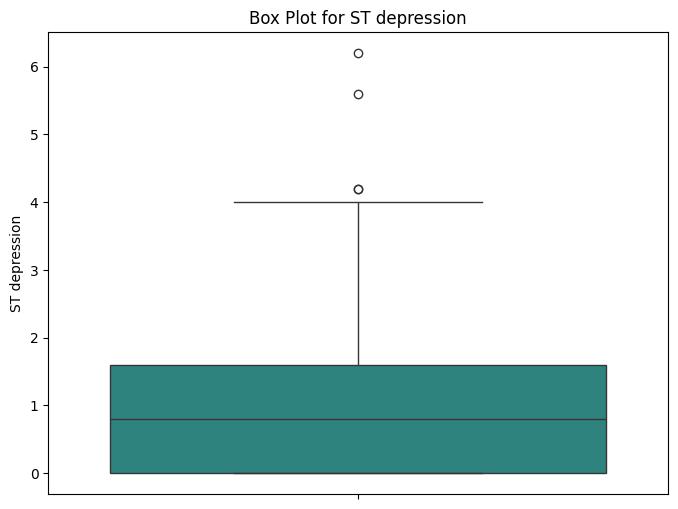

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['ST depression'],palette='viridis')
plt.title('Box Plot for ST depression')
plt.show()

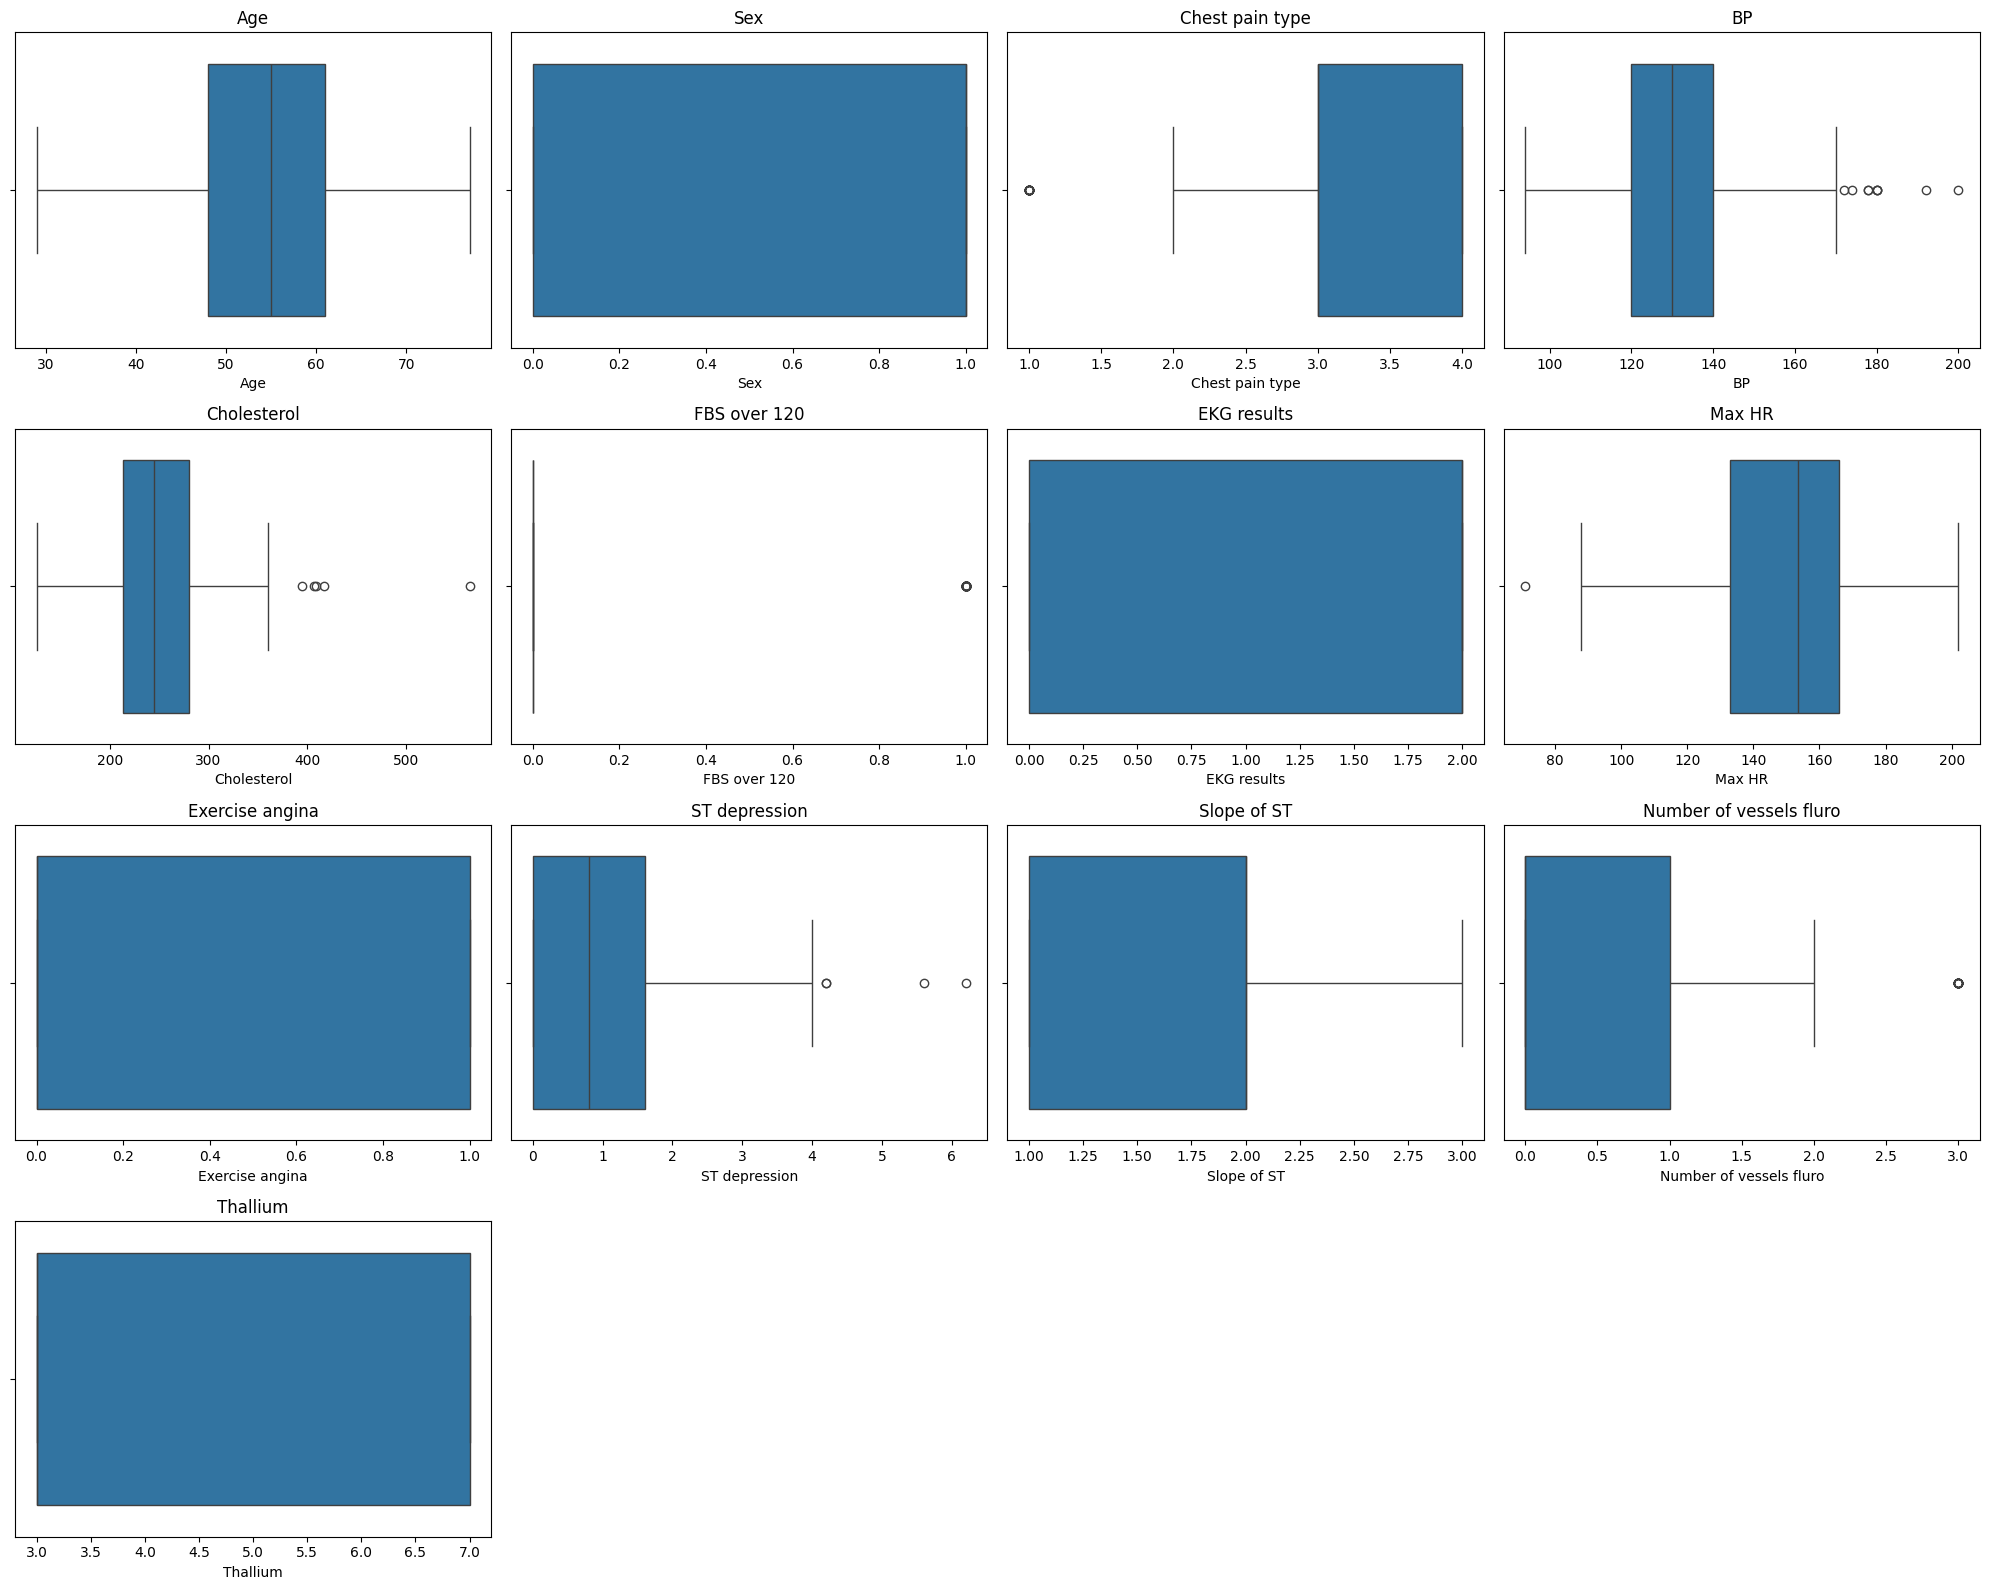

In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
cols= ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium']
n_cols = 4                          # plots per row
n_rows = math.ceil(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

# remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
columns_for_boxplotting = ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium']

for index in range(len(columns_for_boxplotting)):
  Q1 = df[columns_for_boxplotting[index]].quantile(0.25)
  Q3 = df[columns_for_boxplotting[index]].quantile(0.75)

  IQR = Q3 - Q1
  lower_limit = Q1 - 1.5 * IQR
  upper_limit = Q3 + 1.5 * IQR

  df[columns_for_boxplotting[index]] = df[columns_for_boxplotting[index]].clip(lower = lower_limit, upper = upper_limit)
print("Outlier removal accomplished!")

Outlier removal accomplished!


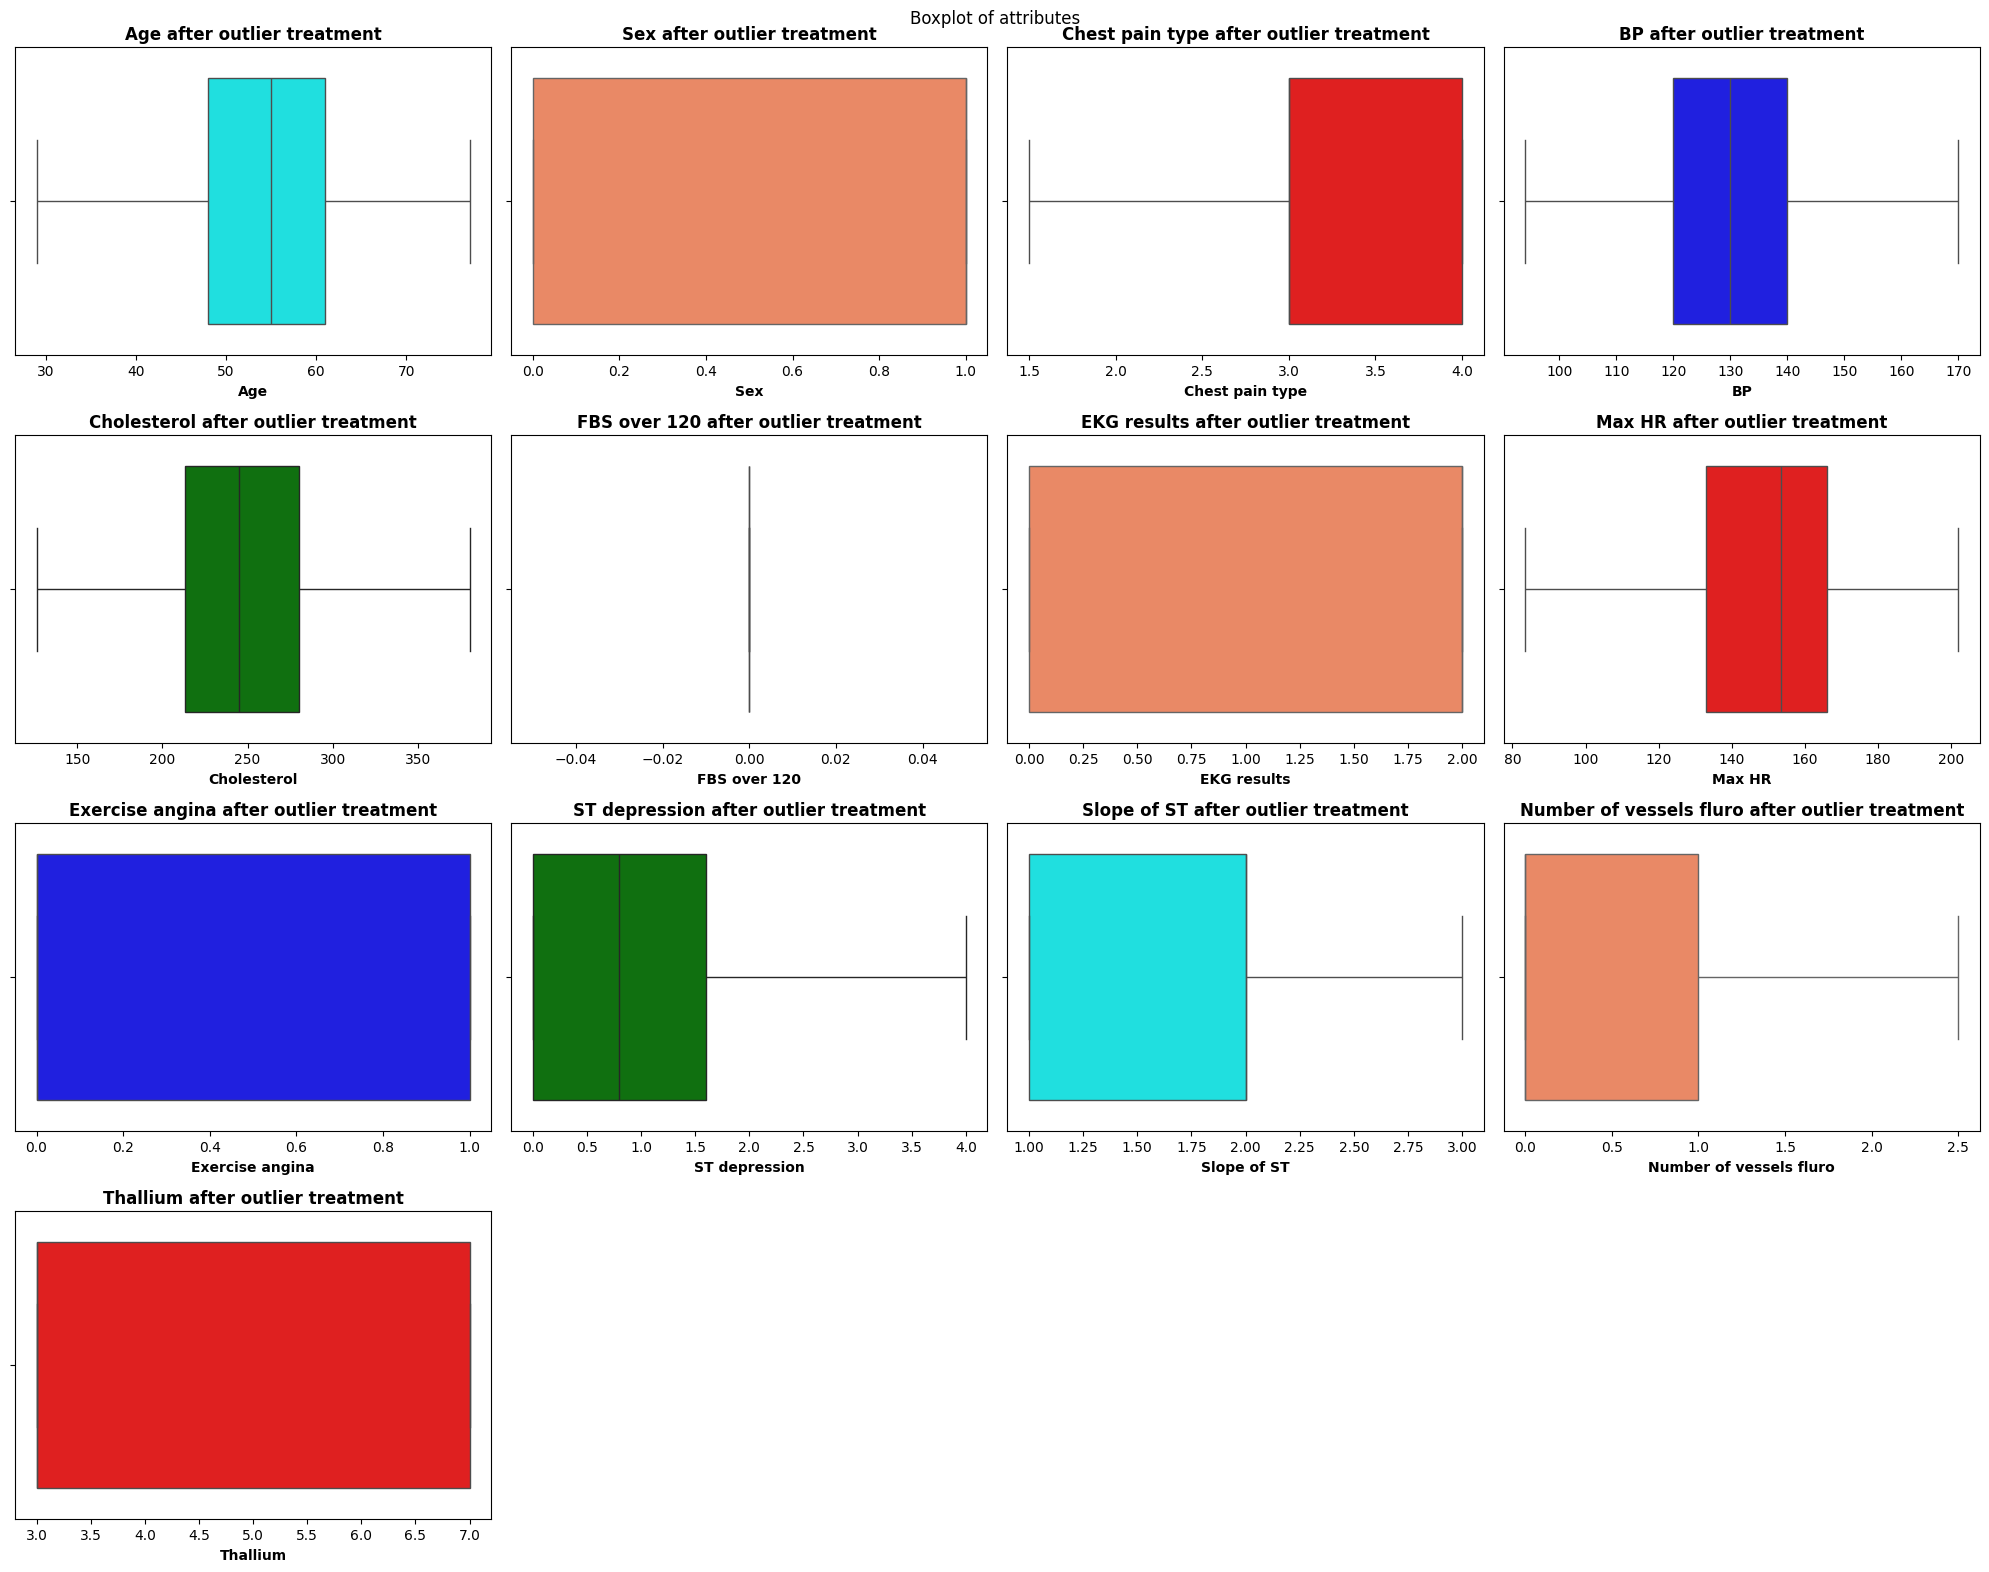

In [ ]:
import math

n_cols = 4
n_rows = math.ceil(len(columns_for_boxplotting) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
colours = ['cyan', 'coral', 'red', 'blue', 'green']
axes = axes.flatten()

for index in range(len(columns_for_boxplotting)):
  sns.boxplot(x=df[columns_for_boxplotting[index]], ax=axes[index], color=colours[index % len(colours)]) # Cycle through colors
  axes[index].set_xlabel(f'{columns_for_boxplotting[index]}', fontweight='bold')
  axes[index].set_title(f'{columns_for_boxplotting[index]} after outlier treatment', fontweight='bold') # Changed 'before' to 'after'


for j in range(index + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Boxplot of attributes", fontweight=18)
plt.tight_layout()
plt.show()

One hot encoding

In [ ]:
df = pd.concat([df,pd.get_dummies(df['Thallium'],prefix='Thallium',drop_first=True,dtype=int)],axis=1)
df = df.drop(columns=['Thallium'])
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Heart Disease,Thallium_6,Thallium_7
0,70,1,4.0,130,322.0,0,2,109.0,0,2.4,2,2.5,Presence,0,0
1,67,0,3.0,115,380.5,0,2,160.0,0,1.6,2,0.0,Absence,0,1
2,57,1,2.0,124,261.0,0,0,141.0,0,0.3,1,0.0,Presence,0,1
3,64,1,4.0,128,263.0,0,0,105.0,1,0.2,2,1.0,Absence,0,1
4,74,0,2.0,120,269.0,0,2,121.0,1,0.2,1,1.0,Absence,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3.0,170,199.0,0,0,162.0,0,0.5,1,0.0,Absence,0,1
266,44,1,2.0,120,263.0,0,0,173.0,0,0.0,1,0.0,Absence,0,1
267,56,0,2.0,140,294.0,0,2,153.0,0,1.3,2,0.0,Absence,0,0
268,57,1,4.0,140,192.0,0,0,148.0,0,0.4,2,0.0,Absence,1,0


In [ ]:
df = pd.concat([df,pd.get_dummies(df['EKG results'],prefix='EKG results',drop_first=True,dtype=int)],axis=1)
df = df.drop(columns=['EKG results'])
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Heart Disease,Thallium_6,Thallium_7,EKG results_1,EKG results_2
0,70,1,4.0,130,322.0,0,109.0,0,2.4,2,2.5,Presence,0,0,0,1
1,67,0,3.0,115,380.5,0,160.0,0,1.6,2,0.0,Absence,0,1,0,1
2,57,1,2.0,124,261.0,0,141.0,0,0.3,1,0.0,Presence,0,1,0,0
3,64,1,4.0,128,263.0,0,105.0,1,0.2,2,1.0,Absence,0,1,0,0
4,74,0,2.0,120,269.0,0,121.0,1,0.2,1,1.0,Absence,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3.0,170,199.0,0,162.0,0,0.5,1,0.0,Absence,0,1,0,0
266,44,1,2.0,120,263.0,0,173.0,0,0.0,1,0.0,Absence,0,1,0,0
267,56,0,2.0,140,294.0,0,153.0,0,1.3,2,0.0,Absence,0,0,0,1
268,57,1,4.0,140,192.0,0,148.0,0,0.4,2,0.0,Absence,1,0,0,0


In [ ]:
df = pd.concat([df,pd.get_dummies(df['Slope of ST'],prefix='Slope of ST',drop_first=True,dtype=int)],axis=1)
df = df.drop(columns=['Slope of ST'])
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,Max HR,Exercise angina,ST depression,Number of vessels fluro,Heart Disease,Thallium_6,Thallium_7,EKG results_1,EKG results_2,Slope of ST_2,Slope of ST_3
0,70,1,4.0,130,322.0,0,109.0,0,2.4,2.5,Presence,0,0,0,1,1,0
1,67,0,3.0,115,380.5,0,160.0,0,1.6,0.0,Absence,0,1,0,1,1,0
2,57,1,2.0,124,261.0,0,141.0,0,0.3,0.0,Presence,0,1,0,0,0,0
3,64,1,4.0,128,263.0,0,105.0,1,0.2,1.0,Absence,0,1,0,0,1,0
4,74,0,2.0,120,269.0,0,121.0,1,0.2,1.0,Absence,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3.0,170,199.0,0,162.0,0,0.5,0.0,Absence,0,1,0,0,0,0
266,44,1,2.0,120,263.0,0,173.0,0,0.0,0.0,Absence,0,1,0,0,0,0
267,56,0,2.0,140,294.0,0,153.0,0,1.3,0.0,Absence,0,0,0,1,1,0
268,57,1,4.0,140,192.0,0,148.0,0,0.4,0.0,Absence,1,0,0,0,1,0


In [ ]:
df = pd.concat([df,pd.get_dummies(df['Number of vessels fluro'],prefix='Number of vessels fluro',drop_first=True,dtype=int)],axis=1)
df = df.drop(columns=['Number of vessels fluro'])
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,Max HR,Exercise angina,ST depression,Heart Disease,Thallium_6,Thallium_7,EKG results_1,EKG results_2,Slope of ST_2,Slope of ST_3,Number of vessels fluro_1.0,Number of vessels fluro_2.0,Number of vessels fluro_2.5
0,70,1,4.0,130,322.0,0,109.0,0,2.4,Presence,0,0,0,1,1,0,0,0,1
1,67,0,3.0,115,380.5,0,160.0,0,1.6,Absence,0,1,0,1,1,0,0,0,0
2,57,1,2.0,124,261.0,0,141.0,0,0.3,Presence,0,1,0,0,0,0,0,0,0
3,64,1,4.0,128,263.0,0,105.0,1,0.2,Absence,0,1,0,0,1,0,1,0,0
4,74,0,2.0,120,269.0,0,121.0,1,0.2,Absence,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3.0,170,199.0,0,162.0,0,0.5,Absence,0,1,0,0,0,0,0,0,0
266,44,1,2.0,120,263.0,0,173.0,0,0.0,Absence,0,1,0,0,0,0,0,0,0
267,56,0,2.0,140,294.0,0,153.0,0,1.3,Absence,0,0,0,1,1,0,0,0,0
268,57,1,4.0,140,192.0,0,148.0,0,0.4,Absence,1,0,0,0,1,0,0,0,0


In [ ]:
df['ST depression'].value_counts()

,count
ST depression,
0.0,85
1.2,14
1.4,13
0.6,12
1.0,12
0.8,11
0.2,11
1.6,11
1.8,10


In [ ]:
columns_for_scalling = ['Age','BP','Cholesterol','Max HR','ST depression']

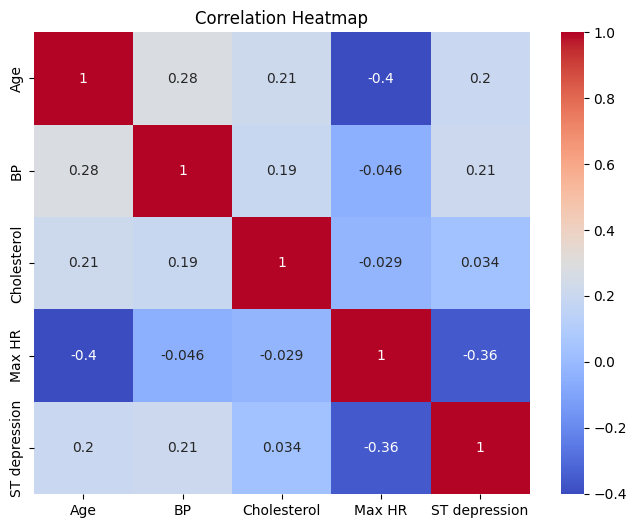

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[columns_for_scalling].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#apply Scalling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[columns_for_scalling] = scaler.fit_transform(df[columns_for_scalling])

display(df.head())

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,Max HR,Exercise angina,ST depression,Heart Disease,Thallium_6,Thallium_7,EKG results_1,EKG results_2,Slope of ST_2,Slope of ST_3,Number of vessels fluro_1.0,Number of vessels fluro_2.0,Number of vessels fluro_2.5
0,1.712094,1,4.0,-0.057210,1.549364,0,-1.772364,0,1.253423,Presence,0,0,0,1,1,0,0,0,1
1,1.382140,0,3.0,-0.951808,2.784055,0,0.447222,0,0.519115,Absence,0,1,0,1,1,0,0,0,0
2,0.282294,1,2.0,-0.415049,0.261908,0,-0.379683,0,-0.674136,Presence,0,1,0,0,0,0,0,0,0
3,1.052186,1,4.0,-0.176490,0.304119,0,-1.946450,1,-0.765924,Absence,0,1,0,0,1,0,1,0,0
4,2.152032,0,2.0,-0.653609,0.430754,0,-1.250109,1,-0.765924,Absence,0,0,0,1,0,0,1,0,0


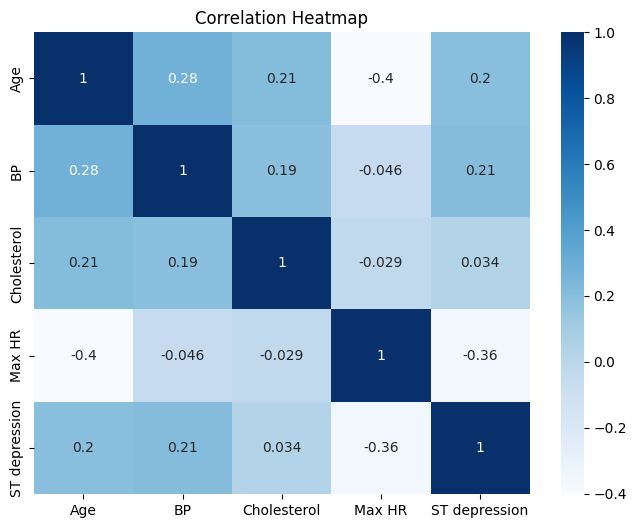

In [ ]:
# apply heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[columns_for_scalling].corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#Splitting the dataset into test and train set
from sklearn.model_selection import train_test_split

y = df['Heart Disease']

X_train, X_test = train_test_split(df, test_size=0.2, random_state=2,stratify=y)

y_train= X_train['Heart Disease']
X_train = X_train.drop(columns=['Heart Disease'])
y_test = X_test['Heart Disease']
X_test = X_test.drop(columns=['Heart Disease'])

In [ ]:
y_test.value_counts()

,count
Heart Disease,
Absence,30
Presence,24


Checking class stratify working efficiency

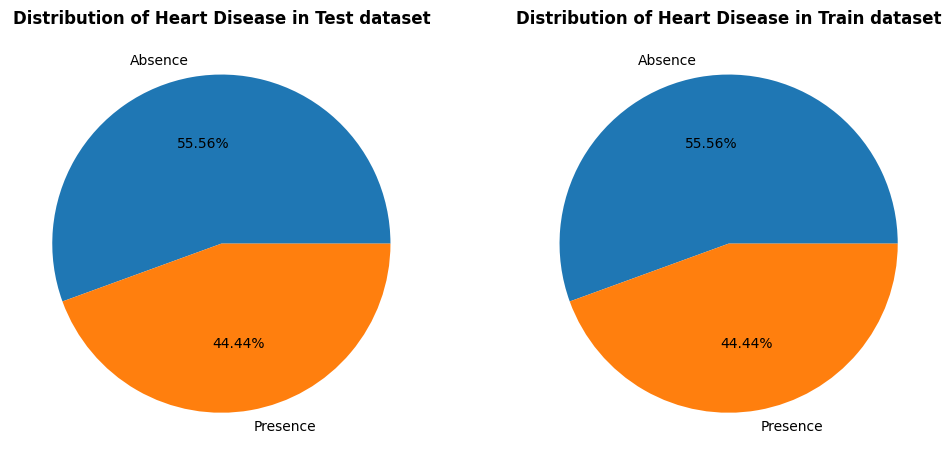

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,8))

axes[0].pie(y_train.value_counts(),labels = ['Absence','Presence'],autopct='%1.2f%%')
axes[0].set_title("Distribution of Heart Disease in Test dataset",fontweight = 'bold')

axes[1].pie(y_test.value_counts(),labels = ['Absence','Presence'],autopct='%1.2f%%')
axes[1].set_title("Distribution of Heart Disease in Train dataset",fontweight = 'bold')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(C=0.85,max_iter=10000)
model.fit(X_train,y_train)

LogisticRegression(C=0.85, max_iter=10000)

In [ ]:
Y_predicted = model.predict(X_test)

In [ ]:
from sklearn.metrics import  classification_report
model = classification_report(y_test,Y_predicted)
print(model) # there is no use of support

              precision    recall  f1-score   support

     Absence       0.78      0.83      0.81        30
    Presence       0.77      0.71      0.74        24

    accuracy                           0.78        54
   macro avg       0.78      0.77      0.77        54
weighted avg       0.78      0.78      0.78        54



Interpretation :- According to the classification report we get the value of precision absence is 89% and present is 81%. (When the model predicts Absence, it is correct 89% of the time.)




and recall absence is 83% and present is 88%.
(The model correctly identifies 83% of all actual Absence cases.)



and the f1-score of absence is 86% and present is 84%.
(Balanced performance between precision and recall for Absence).


In [ ]:
from sklearn.metrics import confusion_matrix
model = confusion_matrix(y_test,Y_predicted)
print(model)

[[25  5]
 [ 7 17]]


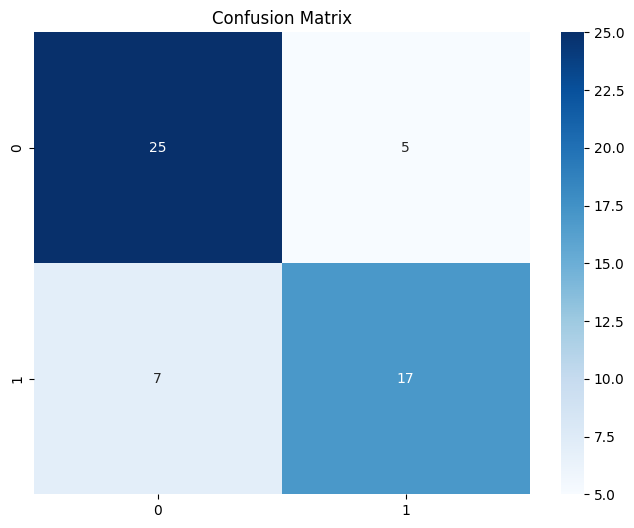

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(model, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Nural Network :- An artificial Neural network is a system of simple processing elements operating in parallel to achieve,store, and use Experimental knowledge.

In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
clf = classification_report(y_test,y_pred)
print(clf)

              precision    recall  f1-score   support

     Absence       0.77      0.77      0.77        30
    Presence       0.71      0.71      0.71        24

    accuracy                           0.74        54
   macro avg       0.74      0.74      0.74        54
weighted avg       0.74      0.74      0.74        54



In [ ]:
from sklearn.metrics import confusion_matrix
clf = confusion_matrix(y_test,y_pred)
print(clf)

[[23  7]
 [ 7 17]]


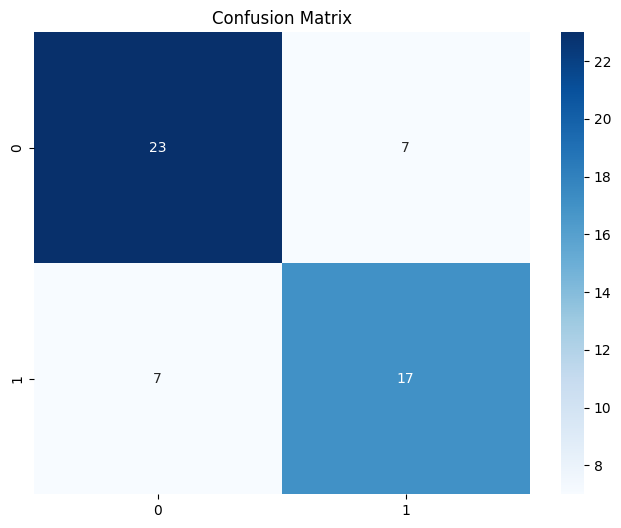

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 6))
sns.heatmap(clf, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#SVM

from sklearn.svm import SVC

In [ ]:
clf = SVC(kernel = 'linear')
clf.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
y_preda = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
clf = classification_report(y_test,y_preda)
print(clf)

              precision    recall  f1-score   support

     Absence       0.75      0.80      0.77        30
    Presence       0.73      0.67      0.70        24

    accuracy                           0.74        54
   macro avg       0.74      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54



In [ ]:
from sklearn.metrics import confusion_matrix
clf = confusion_matrix(y_test,y_preda)
print(clf)

[[24  6]
 [ 8 16]]


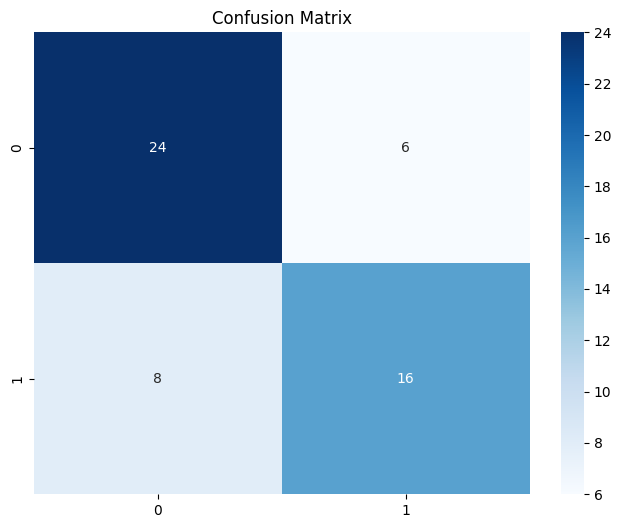

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Confusion Matrix')
sns.heatmap(clf,annot=True,cmap='Blues',fmt='g')
plt.show()

In [ ]:
# Random forest for import of  RandomForestClassifier we use sklearn.ensemble

from sklearn.ensemble import RandomForestClassifier
clf =RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pread = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
clf = classification_report(y_test,y_pread)
print(clf)

              precision    recall  f1-score   support

     Absence       0.74      0.87      0.80        30
    Presence       0.79      0.62      0.70        24

    accuracy                           0.76        54
   macro avg       0.77      0.75      0.75        54
weighted avg       0.76      0.76      0.75        54



In [ ]:
from sklearn.metrics import confusion_matrix
clf = confusion_matrix(y_test,y_pread)
print(clf)

[[26  4]
 [ 9 15]]


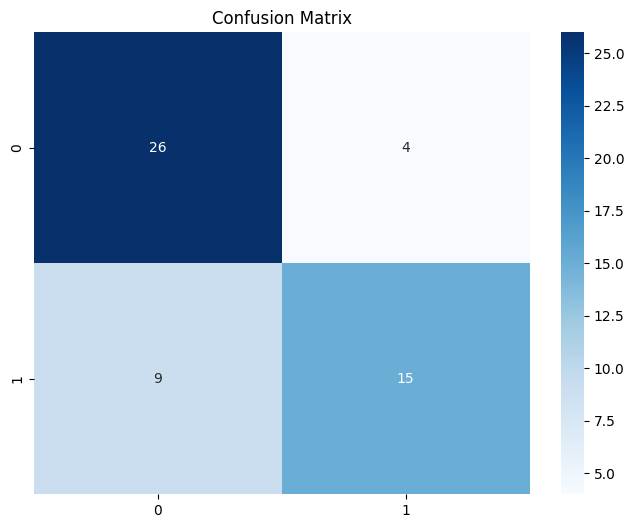

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Confusion Matrix')
sns.heatmap(clf,annot=True,cmap='Blues',fmt='g')
plt.show()


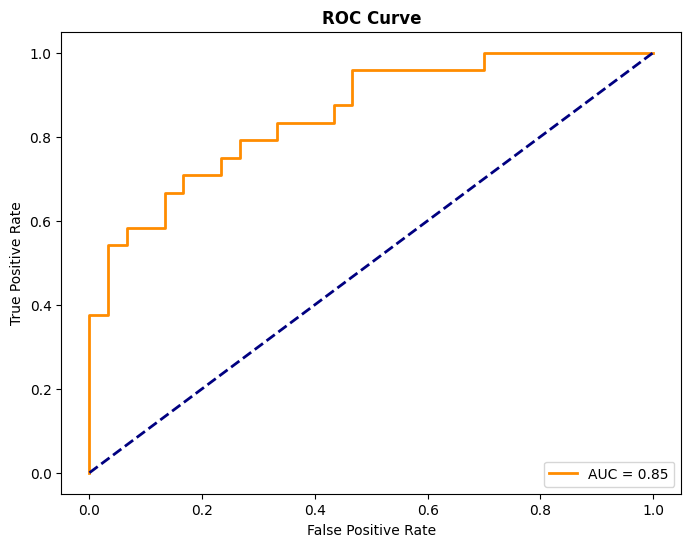

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
p
log_reg_model = LogisticRegression(C=0.85, max_iter=10000)
log_reg_model.fit(X_train, y_train)

Y_pred_proba = log_reg_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, Y_pred_proba, pos_label='Presence')
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve', fontweight='bold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [ ]:
y_test = y_test.map({'Absence': 0, 'Presence': 1})

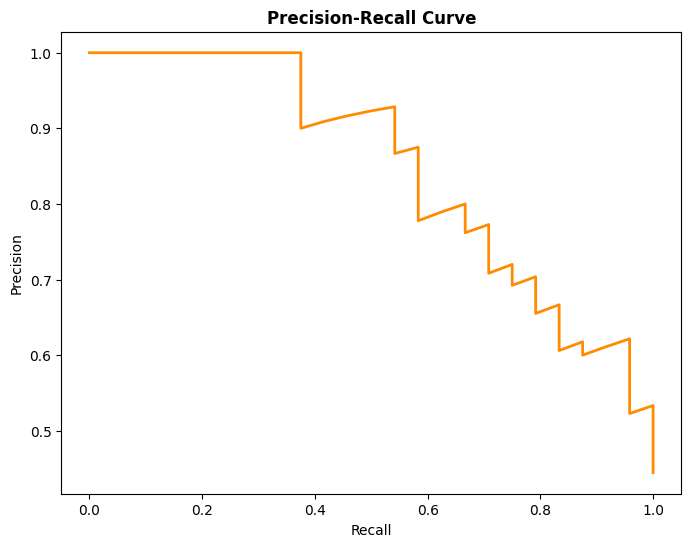

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, Y_pred_proba)


plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve', fontweight='bold')
plt.show()

In [ ]:
y_test

,Heart Disease
213,Presence
264,Presence
211,Absence
76,Absence
187,Absence
125,Absence
40,Presence
248,Presence
60,Absence
93,Presence


In [ ]:
from seaborn.utils import adjust_legend_subtitles
from numpy import exp,array, random, dot

class NeuralNetwork():
  def __init__(self):
    random.seed(1)
    self.synaptic_weights = 2 * randim.random((3,1) -1)

  def __sigmoid(self,x):
    return 1/(1+exp(-x))

  def __sigmoid_derivative(self,x):
    return x*(1-x)

  def train(self,training_inputs,training_outputs,training_iterations):
    for iteration in range(training_iterations):
      output= self.think(training_set_inputs)
      error=training_set_outputs - output
      adjustment = dot(training_set_inputs.T,error*self.__sigmoid_derivative(output))
      self.synaptic_weights += adjustment

    def think(self,inputs):
      return self.__sigmoid(dot(inputs,self.synaptic_weights))

In [ ]:
from numpy import exp, array, random, dot

class NeuralNetwork():
    def __init__(self):
        # Seed the random number generator, so it generates the same numbers
        # every time the program runs.
        random.seed(1)

        # We model a single neuron, with 3 input connections and 1 output connection
        # we assign random weights to a 3 x 1 matrix, with values in the range -1 to 1
        # and mean 0.
        self.synaptic_weights = 2 * random.random((3, 1)) - 1

    # The Sigmoid function, which describes as S shaped curve.
    # We pass the weighted sum of the inputs through this function to
    # normalise them between 0 and 1
    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))

    # The derivative of the Sigmoid function
    # This is the gradient of the Sigmoid curve.
    # It indicates how confident we are about the existing weight.
    def __sigmoid_derivative(self, x):
        return x * (1 - x)

    # We train the neural network through a process of trial and error.
    # Adjusting the synaptic weights each time.
    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
        for iteration in range(number_of_training_iterations):
            # Pass the training set through our neural network (our single neuron).
            output = self.think(training_set_inputs)

            # Calculate the error (The difference between the desired output
            # and the predicted output).
            error = training_set_outputs - output

            # Multiply the error by the input and again by the gradient of the Sigmoid curve.
            # This means less confident weights are adjusted more.
            # This means inputs, which are zero do not cause changes to the weights.
            adjustments = dot(training_set_inputs.T, error * self.__sigmoid_derivative(output))

            # Adjust the weights.
            self.synaptic_weights += adjustments

    # The neural network thinks:
    def think(self, inputs):
        # Pass inputs through our neural network (our single neuron).
        return self.__sigmoid(dot(inputs, self.synaptic_weights))

# Intialise a single neuron neural network.
neural_network = NeuralNetwork()

print("Random starting synaptic weights: ")
print(neural_network.synaptic_weights)


training_set_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
training_set_outputs = array([[0, 1, 1, 0]]).T

neural_network.train(training_set_inputs, training_set_outputs, 10000)

print("New synaptic weights after training: ")
print(neural_network.synaptic_weights)

Random starting synaptic weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
New synaptic weights after training: 
[[ 9.67299303]
 [-0.2078435 ]
 [-4.62963669]]


In [ ]:
from numpy import loadtxt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

X = X_train
y = y_train_numerical

model = Sequential()
model.add(Dense(16,input_shape=(X.shape[1],),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X, y, epochs=150, batch_size = 10, validation_split=0.2)

Epoch 1/150


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4734 - loss: 0.7268 - val_accuracy: 0.5000 - val_loss: 0.7119
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4205 - loss: 0.7186 - val_accuracy: 0.5000 - val_loss: 0.7016
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5338 - loss: 0.6958 - val_accuracy: 0.5000 - val_loss: 0.6925
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5498 - loss: 0.6919 - val_accuracy: 0.5000 - val_loss: 0.6841
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6176 - loss: 0.6790 - val_accuracy: 0.5909 - val_loss: 0.6754
Epoch 6/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6440 - loss: 0.6717 - val_accuracy: 0.7727 - val_loss: 0.6647
Epoch 7/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7339 - loss: 0.6659 - val_accuracy: 0.7955 - val_loss: 0.6510
Epoch 8/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7715 - loss: 0.6496 - val_accuracy: 0.8182 - val_l

In [ ]:
model = Sequential()
model.add(Dense(16,input_shape=(X_train.shape[1],),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

y_train_numerical = y_train.map({'Absence': 0, 'Presence': 1})

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train, y_train_numerical, epochs=150, batch_size = 10, validation_split=0.2)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.4940 - loss: 0.7080 - val_accuracy: 0.6136 - val_loss: 0.6584
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6418 - loss: 0.6653 - val_accuracy: 0.6591 - val_loss: 0.6218
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6834 - loss: 0.6270 - val_accuracy: 0.7045 - val_loss: 0.5846
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6867 - loss: 0.6141 - val_accuracy: 0.7273 - val_loss: 0.5542
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7263 - loss: 0.5830 - val_accuracy: 0.7955 - val_loss: 0.5261
Epoch 6/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7651 - loss: 0.5447 - val_accuracy: 0.8182 - val_loss: 0.5018
Epoch 7/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7358 - loss: 0.5689 - val_accuracy: 0.8182 - val_loss: 0.4796
Epoch 8/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7423 - loss: 0.5432 - val_accuracy: 0.

In [ ]:
accuracy = model.evaluate(X_train,y)
print('Accuracy: %.2f' % (accuracy[1]*100))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9474 - loss: 0.1518 
Accuracy: 94.44


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


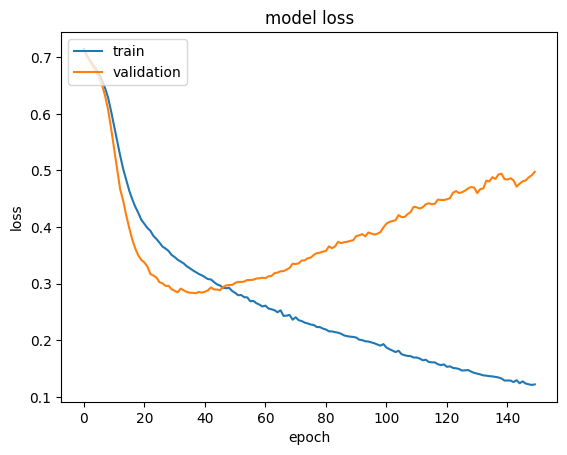

In [ ]:
import matplotlib.pyplot as plt

print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

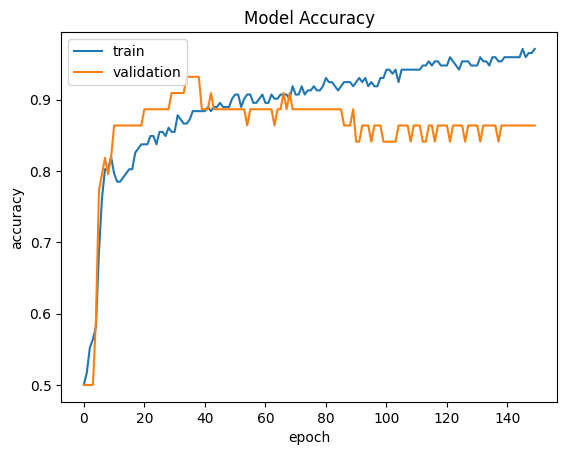

In [ ]:
#summarize history for accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()